In [36]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [37]:
!pip install tensorflow keras numpy matplotlib pandas sklearn Bio

In [0]:
#import the libraries
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,AveragePooling2D
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re, ast
import keras
np.random.seed(1000)
from keras.optimizers import SGD
from keras.layers import BatchNormalization
import tensorflow as tf
from sklearn.metrics import auc


Class 0: 3498
Class 1: 590
Proportion: 5.93 : 1


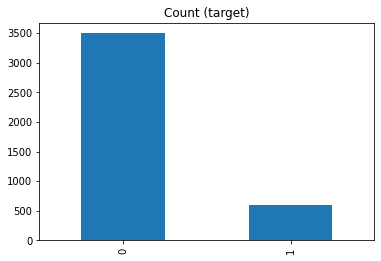

In [39]:

df_train=pd.read_csv('/content/drive/My Drive/Glutarylation/train_Binary_Encoding.csv')
target_count = df_train.Glutarylation.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [40]:
# Class count
train_count_class_0, train_count_class_1 = df_train.Glutarylation.value_counts()

# Divide by class
train_class_0 = df_train[df_train.Glutarylation == 0]
train_class_1 = df_train[df_train.Glutarylation == 1]
print(len(train_class_0))

3498


Random over-sampling:
1    3498
0    3498
Name: Glutarylation, dtype: int64


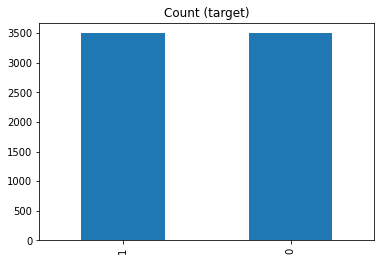

In [41]:

import pandas as pd
train_class_1_over = train_class_1.sample(train_count_class_0, replace=True)
df_train_over = pd.concat([train_class_0, train_class_1_over], axis=0)

print('Random over-sampling:')
print(df_train_over.Glutarylation.value_counts())

df_train_over.Glutarylation.value_counts().plot(kind='bar', title='Count (target)');

In [0]:
X=df_train_over.Image_Array

In [43]:
print(X[0])

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0,

In [0]:
Y=df_train_over.Glutarylation

In [45]:
print(Y[0])

0


In [46]:
NP_list=[]
y_train=np.array(Y)
print(len(y_train))
y1=np.array(Y)
for i in X:
    NP=np.array(ast.literal_eval(i))
    NP_list.append(NP)
print(len(NP_list[0]))
X_train=np.array(NP_list)
print(len(X_train))
print(X_train[0])

6996
35
6996
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [47]:
# #split data into train and test sets
# X_train,X_val,y_train,y_val=train_test_split(image,level,validation_split=0.2,random_state=20)
print(len(X_train))

6996


In [0]:
#Reshape the data to fit the model
x = X_train.reshape(6996,35,21,1)


 Accuracy :79.29%   Precision :79.88%   Sensitivity :78.29%   ACC :79.29%   MCC :58.58%   AUC :85.98%
 Accuracy :76.14%   Precision :76.99%   Sensitivity :74.57%   ACC :76.14%   MCC :52.31%   AUC :84.34%
 Accuracy :74.29%   Precision :72.49%   Sensitivity :78.29%   ACC :74.29%   MCC :48.73%   AUC :82.79%
 Accuracy :75.57%   Precision :70.20%   Sensitivity :88.86%   ACC :75.57%   MCC :53.05%   AUC :84.01%
 Accuracy :73.00%   Precision :80.38%   Sensitivity :60.86%   ACC :73.00%   MCC :47.42%   AUC :84.76%
 Accuracy :71.29%   Precision :67.29%   Sensitivity :82.86%   ACC :71.29%   MCC :43.76%   AUC :79.08%
 Accuracy :73.53%   Precision :68.64%   Sensitivity :86.53%   ACC :73.53%   MCC :48.77%   AUC :83.06%
 Accuracy :69.10%   Precision :62.76%   Sensitivity :93.70%   ACC :69.10%   MCC :43.92%   AUC :79.84%
 Accuracy :77.97%   Precision :72.07%   Sensitivity :91.43%   ACC :77.97%   MCC :58.06%   AUC :88.24%
 Accuracy :79.83%   Precision :75.06%   Sensitivity :89.43%   ACC :79.83%   MCC :6

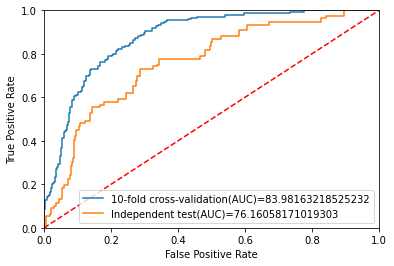

In [49]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from keras.optimizers import Adam, SGD
import math
import numpy
import tensorflow.compat.v1 as tf
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
accu_lst = []
sen_lst=[]
pre_lst=[]
acc_lst=[]
mcc_lst=[]
auc_lst=[]

with tf.Session() as sess:

  
  for train, test in kfold.split(x, y1):

      
      df_test=pd.read_csv('/content/drive/My Drive/Glutarylation/test_Binary_Encoding.csv')
      target_count = df_test.Glutarylation.value_counts()


      # Class count
      test_count_class_0, test_tcount_class_1 = df_test.Glutarylation.value_counts()

      # Divide by class
      test_class_0 = df_test[df_test.Glutarylation == 0]
      test_class_1 = df_test[df_test.Glutarylation == 1]

      test_class_1_over = test_class_1.sample(test_count_class_0, replace=True)
      df_test_over = pd.concat([test_class_0, test_class_1_over], axis=0)

      np_list=[]
      x_over=df_test_over.Image_Array
      y_over=df_test_over.Glutarylation
      y_test=np.array(y_over)
      for i in x_over:
          npp=np.array(ast.literal_eval(i))
          np_list.append(npp)
      X_test=np.array(np_list)

      x_test= X_test.reshape(856,35,21,1)

      y = to_categorical(y1)
      yy = to_categorical(y_test)
      #Build the CNN model
      model = Sequential()
      # add model layers
      # add model layers
      model.add(Conv2D(128, kernel_size=3, activation='relu',padding="same", input_shape=(35,21,1)))
      model.add(Conv2D(128, kernel_size=3, activation='relu',padding="same"))
      model.add(Conv2D(128, kernel_size=3, activation='relu',padding="same"))
      model.add(Dropout(0.4))
      model.add(AveragePooling2D(pool_size=(2,2)))
      model.add(Dropout(0.4))

      model.add(Conv2D(64, kernel_size=3, activation='relu',padding="same"))
      model.add(Conv2D(64, kernel_size=3, activation='relu',padding="same"))
      model.add(Conv2D(64, kernel_size=3, activation='relu',padding="same"))
      model.add(Dropout(0.4))
      model.add(AveragePooling2D(pool_size=(2,2)))
      model.add(Dropout(0.4))
      model.add(Flatten())
      model.add(Dense(units=256, activation='relu'))
      model.add(Dense(units=256, activation='relu'))
      model.add(Dense(units=2, activation='softmax'))
      #Compile the model
      opt = Adam(lr=1.0e-4)
      model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
      # Fit the model
      model.fit(x[train], y[train], validation_split=0.10, epochs=12, verbose=0)

      # evaluate the model
      predictions = model.predict(x[test])
      y_pred=( np.argmax(predictions, axis=1))
      #confution matrix generation
      cm=np.array(confusion_matrix(y1[test],y_pred,labels=[0,1]))
      confusion=pd.DataFrame(cm,index=['not_Glutarylation','Glutarylation'],
                              columns=['predicted_not_Glutarylation','predicted_Glutarylation'])
      
      True_Positive=confusion.at['Glutarylation','predicted_Glutarylation']
      False_Positive=confusion.at['not_Glutarylation','predicted_Glutarylation']
      True_Negative=confusion.at['not_Glutarylation','predicted_not_Glutarylation']
      False_Negative=confusion.at['Glutarylation','predicted_not_Glutarylation']
      
      #Accuracy==>>accuracy = (correctly predicted class / total testing class) × 100%
      # accuracy_score(y_predict, y_test)

      total_testing_class=True_Positive+True_Negative+False_Positive+False_Negative
      correctly_predicted_class=True_Positive + True_Negative
      accuracy = (correctly_predicted_class / total_testing_class) * 100
      
      # Precision = TP / TP + FP
      precision = (True_Positive / (True_Positive + False_Positive))*100
      
      # Sensitivity = TP / TP + FN
      sensitivity = (True_Positive / (True_Positive + False_Negative))*100

      #ACC=TP+TN / TP+FP+TN+FN
      acc = (True_Positive + True_Negative) /(True_Positive+True_Negative+False_Positive+False_Negative) *100
      #MCC = TP*TN - FN*FP / sqrt((TP+FN)*(TN+FP)*(TP+FP)*(TN+FN))
      mcc = ((True_Positive * True_Negative) - (False_Positive * False_Negative)) / math.sqrt((True_Positive + False_Negative) * (True_Negative + False_Positive)*(True_Positive + False_Positive)*(True_Negative + False_Negative)) *100
      
      lr_probs = model.predict_proba(x[test])
      lr_probs = lr_probs[:, 1]
      lr_auc = (roc_auc_score(y1[test], lr_probs))*100


      print(" Accuracy :%.2f%%   Precision :%.2f%%   Sensitivity :%.2f%%   ACC :%.2f%%   MCC :%.2f%%   AUC :%.2f%%"% (accuracy,precision,sensitivity,acc,mcc,lr_auc))
      accu_lst.append(accuracy)
      sen_lst.append(sensitivity)
      pre_lst.append(precision)
      acc_lst.append(acc)
      mcc_lst.append(mcc)
      auc_lst.append(lr_auc)
  print ('10 Fold cross-validation performance measurement :')
  print("Accuracy    :%.2f%% (+/- %.2f%%)" % (numpy.mean(accu_lst), numpy.std(accu_lst)))
  print("Precision   :%.2f%% (+/- %.2f%%)" % (numpy.mean(pre_lst), numpy.std(pre_lst)))
  print("Sensitivity :%.2f%% (+/- %.2f%%)" % (numpy.mean(sen_lst), numpy.std(sen_lst)))
  print("MCC         :%.2f%% (+/- %.2f%%)" % (numpy.mean(mcc_lst), numpy.std(mcc_lst)))
  print("AUC         :%.2f%% (+/- %.2f%%)" % (numpy.mean(auc_lst), numpy.std(auc_lst)))
  
  
  
  #independent_test

      
  test_prediction = model.predict(x_test)
  yy_pred=( np.argmax(test_prediction,axis=1))

  results = confusion_matrix(y_test,yy_pred) 
  print ('Independent test set performance measurement :')
  print ('Confusion Matrix :')
  print(results) 
  print ('Accuracy Score :',accuracy_score(y_test,yy_pred))
  print ('Report : ')
  print (classification_report(y_test,yy_pred))

  test_lr_probs = model.predict_proba(x_test)
  test_lr_probs = test_lr_probs[:, 1]
  test_lr_auc = (roc_auc_score(y_test, test_lr_probs))*100
  print("AUC :%.2f%%"%(test_lr_auc))





from matplotlib import pyplot
# calculate roc curves
fpr, tpr, _ = roc_curve(y1[test], lr_probs)
test_fpr, test_tpr, _ = roc_curve(y_test, test_lr_probs)

# plot the roc curve for the model
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.plot(fpr,tpr,label="10-fold cross-validation(AUC)="+str(numpy.mean(auc_lst)))
pyplot.plot(test_fpr,test_tpr,label="Independent test(AUC)="+str(test_lr_auc))
# show the legend
pyplot.plot([0, 1], [0, 1],'r--')
pyplot.xlim([0, 1])
pyplot.ylim([0, 1])
pyplot.legend()
# show the plot
pyplot.show()
  
